<ipython-input-1-b9b456351dbd>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mentions, x='Mention', y='Frequency', palette='viridis')


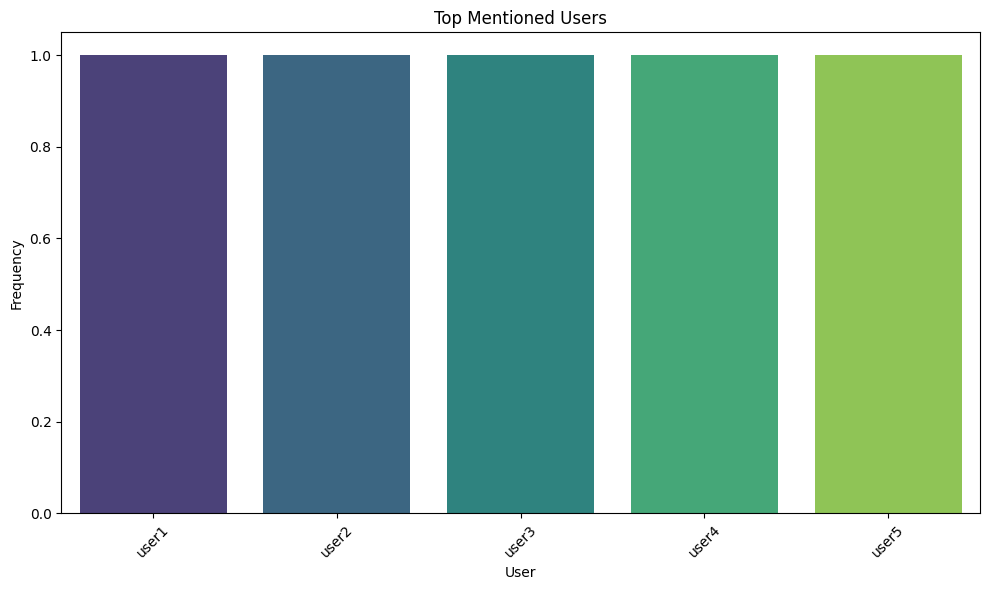

  Mention  Frequency
0   user1          1
1   user2          1
2   user3          1
3   user4          1
4   user5          1


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data with text containing mentions
data = {
    'Text': [
        "Great meeting with @user1 today!",
        "Excited to announce our partnership with @user2.",
        "Thanks for the shoutout @user3, we appreciate it!",
        "Had a productive discussion with @user4 and @user5."
    ]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Define a function to extract mentions from text
def extract_mentions(text):
    mentions = re.findall(r'@(\w+)', text)
    return mentions

# Apply the function to the 'Text' column to extract mentions
df['Mentions'] = df['Text'].apply(extract_mentions)

# Flatten the 'Mentions' column to create a list of all mentions
all_mentions = [mention for sublist in df['Mentions'].tolist() for mention in sublist]

# Create a DataFrame to count the frequency of each mention
mentions_df = pd.DataFrame(all_mentions, columns=['Mention'])
mention_counts = mentions_df['Mention'].value_counts().reset_index()
mention_counts.columns = ['Mention', 'Frequency']

# Plotting the top mentioned users
top_mentions = mention_counts.head(5)  # Get top 5 mentioned users for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_mentions, x='Mention', y='Frequency', palette='viridis')
plt.title('Top Mentioned Users')
plt.xlabel('User')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the frequency of each mention
print(mention_counts)


<ipython-input-2-a49542540558>:51: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


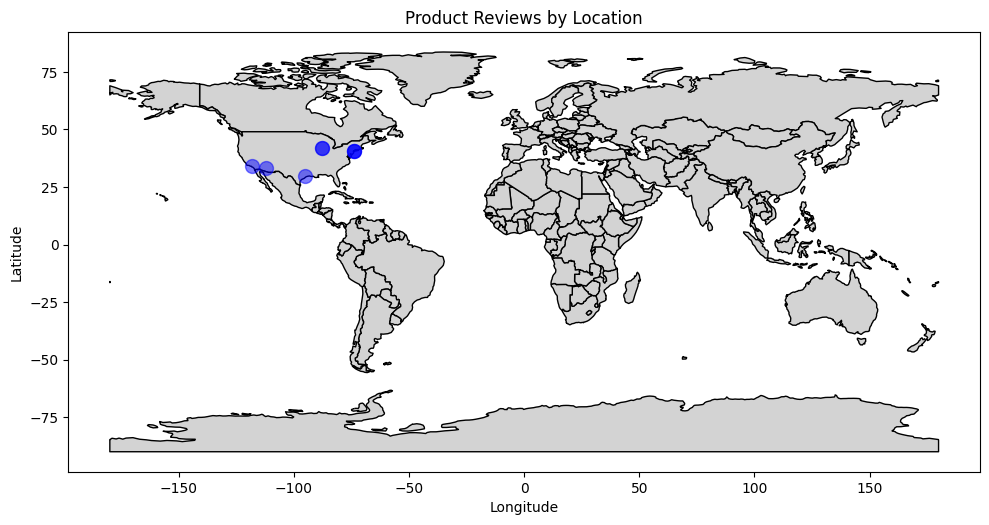

                                              Review     Location   Latitude  \
0                Great product, loved it! (New York)     New York  40.712728   
1  Highly recommended, excellent quality (Los Ang...  Los Angeles  34.053691   
2                     Good value for money (Chicago)      Chicago  41.875562   
3           Not satisfied with the product (Houston)      Houston  29.758938   
4      Amazing experience, would buy again (Phoenix)      Phoenix  33.448437   
5            Very happy with the purchase (New York)     New York  40.712728   
6        Top-notch service, will buy again (Chicago)      Chicago  41.875562   
7           Disappointed with the quality (New York)     New York  40.712728   

    Longitude  
0  -74.006015  
1 -118.242766  
2  -87.624421  
3  -95.367697  
4 -112.074141  
5  -74.006015  
6  -87.624421  
7  -74.006015  


In [ ]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data with product reviews and associated locations (city or country names)
data = {
    'Review': [
        "Great product, loved it! (New York)",
        "Highly recommended, excellent quality (Los Angeles)",
        "Good value for money (Chicago)",
        "Not satisfied with the product (Houston)",
        "Amazing experience, would buy again (Phoenix)",
        "Very happy with the purchase (New York)",
        "Top-notch service, will buy again (Chicago)",
        "Disappointed with the quality (New York)"
    ]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to geocode location names into coordinates
def geocode_location(location_name):
    try:
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")
        return None, None

# Extract location names from reviews and geocode them
df['Location'] = df['Review'].apply(lambda x: x.split('(')[-1].strip(')').strip())
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(geocode_location))

# Filter out rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a GeoDataFrame from the DataFrame with point geometries
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plotting reviews on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgrey', edgecolor='black', figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='blue', markersize=100, alpha=0.5)
plt.title('Product Reviews by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# Display the DataFrame with geocoded locations
print(df[['Review', 'Location', 'Latitude', 'Longitude']])


<ipython-input-3-5e45fe9abdd1>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis')


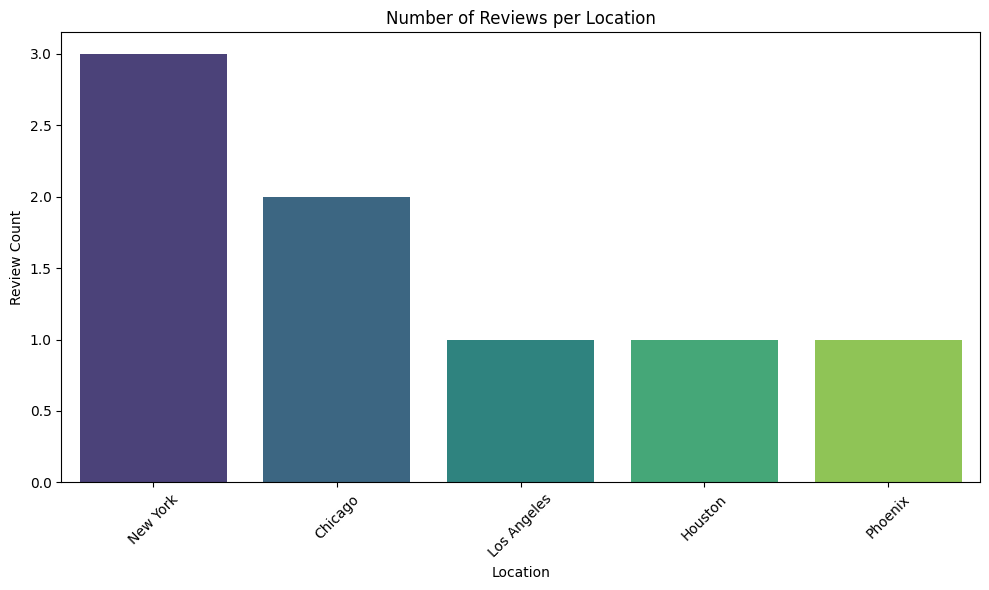

      Location  Review Count
0     New York             3
1      Chicago             2
2  Los Angeles             1
3      Houston             1
4      Phoenix             1


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data with product reviews and associated locations (city or country names)
data = {
    'Review': [
        "Great product, loved it! (New York)",
        "Highly recommended, excellent quality (Los Angeles)",
        "Good value for money (Chicago)",
        "Not satisfied with the product (Houston)",
        "Amazing experience, would buy again (Phoenix)",
        "Very happy with the purchase (New York)",
        "Top-notch service, will buy again (Chicago)",
        "Disappointed with the quality (New York)"
    ]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to geocode location names into coordinates
def geocode_location(location_name):
    try:
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")
        return None, None

# Extract location names from reviews and geocode them
df['Location'] = df['Review'].apply(lambda x: x.split('(')[-1].strip(')').strip())
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(geocode_location))

# Filter out rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Count the number of reviews per location
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Review Count']

# Plotting reviews on a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis')
plt.title('Number of Reviews per Location')
plt.xlabel('Location')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the DataFrame with review counts for each location
print(location_counts)


<ipython-input-4-e89d2765862b>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis')


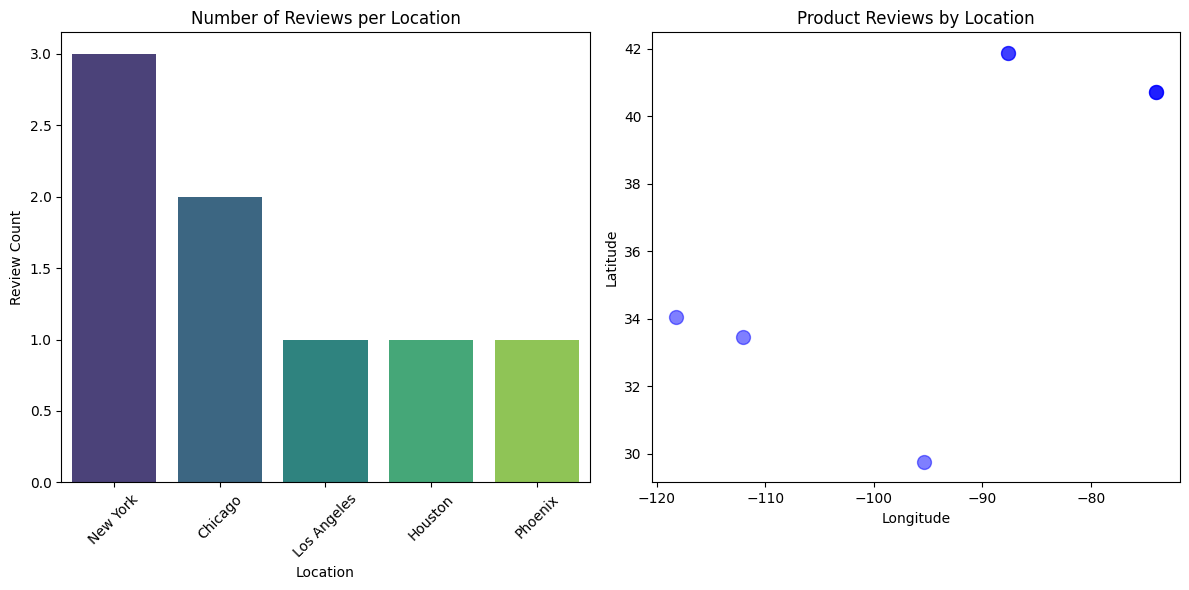

      Location  Review Count
0     New York             3
1      Chicago             2
2  Los Angeles             1
3      Houston             1
4      Phoenix             1


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data with product reviews and associated locations (city or country names)
data = {
    'Review': [
        "Great product, loved it! (New York)",
        "Highly recommended, excellent quality (Los Angeles)",
        "Good value for money (Chicago)",
        "Not satisfied with the product (Houston)",
        "Amazing experience, would buy again (Phoenix)",
        "Very happy with the purchase (New York)",
        "Top-notch service, will buy again (Chicago)",
        "Disappointed with the quality (New York)"
    ]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to geocode location names into coordinates
def geocode_location(location_name):
    try:
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")
        return None, None

# Extract location names from reviews and geocode them
df['Location'] = df['Review'].apply(lambda x: x.split('(')[-1].strip(')').strip())
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(geocode_location))

# Filter out rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Count the number of reviews per location
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Review Count']

# Plotting reviews on a bar chart
plt.figure(figsize=(12, 6))

# Plotting reviews on a map
plt.subplot(1, 2, 1)
sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis')
plt.title('Number of Reviews per Location')
plt.xlabel('Location')
plt.ylabel('Review Count')
plt.xticks(rotation=45)

# Plotting reviews on a map
plt.subplot(1, 2, 2)
plt.scatter(df['Longitude'], df['Latitude'], color='blue', s=100, alpha=0.5)
plt.title('Product Reviews by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

# Display the DataFrame with review counts for each location
print(location_counts)


<ipython-input-5-07dd732afc26>:52: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


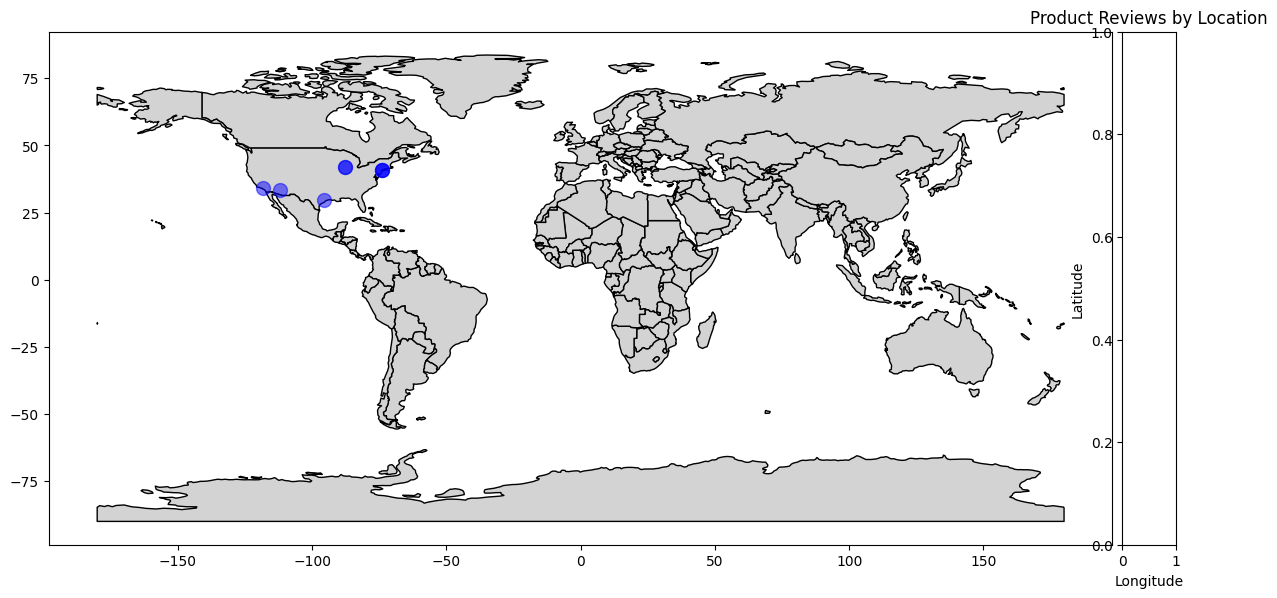

                                              Review     Location   Latitude  \
0                Great product, loved it! (New York)     New York  40.712728   
1  Highly recommended, excellent quality (Los Ang...  Los Angeles  34.053691   
2                     Good value for money (Chicago)      Chicago  41.875562   
3           Not satisfied with the product (Houston)      Houston  29.758938   
4      Amazing experience, would buy again (Phoenix)      Phoenix  33.448437   
5            Very happy with the purchase (New York)     New York  40.712728   
6        Top-notch service, will buy again (Chicago)      Chicago  41.875562   
7           Disappointed with the quality (New York)     New York  40.712728   

    Longitude  
0  -74.006015  
1 -118.242766  
2  -87.624421  
3  -95.367697  
4 -112.074141  
5  -74.006015  
6  -87.624421  
7  -74.006015  


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Sample data with product reviews and associated locations (city or country names)
data = {
    'Review': [
        "Great product, loved it! (New York)",
        "Highly recommended, excellent quality (Los Angeles)",
        "Good value for money (Chicago)",
        "Not satisfied with the product (Houston)",
        "Amazing experience, would buy again (Phoenix)",
        "Very happy with the purchase (New York)",
        "Top-notch service, will buy again (Chicago)",
        "Disappointed with the quality (New York)"
    ]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to geocode location names into coordinates
def geocode_location(location_name):
    try:
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")
        return None, None

# Extract location names from reviews and geocode them
df['Location'] = df['Review'].apply(lambda x: x.split('(')[-1].strip(')').strip())
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(geocode_location))

# Filter out rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a GeoDataFrame from the DataFrame with point geometries
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plotting reviews on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgrey', edgecolor='black', figsize=(12, 6))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

gdf.plot(ax=ax, marker='o', color='blue', markersize=100, alpha=0.5, legend=True, cax=cax)
plt.title('Product Reviews by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

# Display the DataFrame with geocoded locations
print(df[['Review', 'Location', 'Latitude', 'Longitude']])


<ipython-input-6-4054106c2039>:57: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-6-4054106c2039>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis', ax=ax[1])


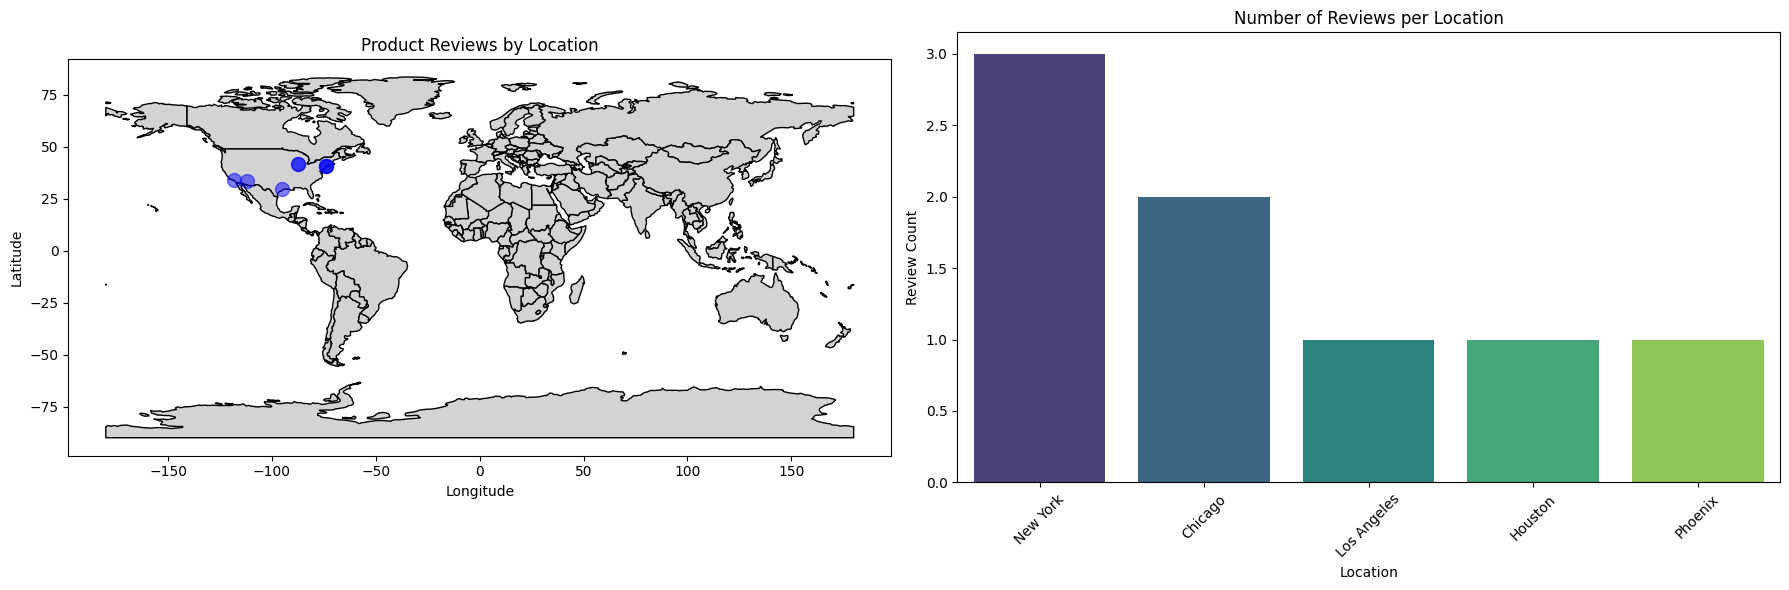

      Location  Review Count
0     New York             3
1      Chicago             2
2  Los Angeles             1
3      Houston             1
4      Phoenix             1


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Sample data with product reviews and associated locations (city or country names)
data = {
    'Review': [
        "Great product, loved it! (New York)",
        "Highly recommended, excellent quality (Los Angeles)",
        "Good value for money (Chicago)",
        "Not satisfied with the product (Houston)",
        "Amazing experience, would buy again (Phoenix)",
        "Very happy with the purchase (New York)",
        "Top-notch service, will buy again (Chicago)",
        "Disappointed with the quality (New York)"
    ]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to geocode location names into coordinates
def geocode_location(location_name):
    try:
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")
        return None, None

# Extract location names from reviews and geocode them
df['Location'] = df['Review'].apply(lambda x: x.split('(')[-1].strip(')').strip())
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(geocode_location))

# Filter out rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a GeoDataFrame from the DataFrame with point geometries
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Count the number of reviews per location
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Review Count']

# Plotting reviews on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting reviews on a map
world.plot(ax=ax[0], color='lightgrey', edgecolor='black')
gdf.plot(ax=ax[0], marker='o', color='blue', markersize=100, alpha=0.5, legend=True)
ax[0].set_title('Product Reviews by Location')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Plotting reviews on a bar chart
sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis', ax=ax[1])
ax[1].set_title('Number of Reviews per Location')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('Review Count')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Display the DataFrame with geocoded locations and review counts for each location
print(location_counts)
